In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from wordcloud import WordCloud

In [68]:
#pip install WordCloud

About the Dataset: and importing it
List of Analysis:

In [5]:
file_path = '../Data/text.csv'
data = pd.read_csv(file_path)

In [6]:
print(data.columns)

Index(['Unnamed: 0', 'text', 'label'], dtype='object')


Exploratory Data Analysis (EDA)
1) the distibution of emotions in the dataset

In [9]:
#the distibution of emotions in the dataset
mapping = {0 : "sadness",
           1 : "joy",
           2 : "love",
           3 : "anger",
           4 : "fear",
           5 : "surprise"
}

data["emotion"] =  data["label"].map(mapping)

Text(0.5, 1.0, 'Distribution of Emotions in the Dataset')

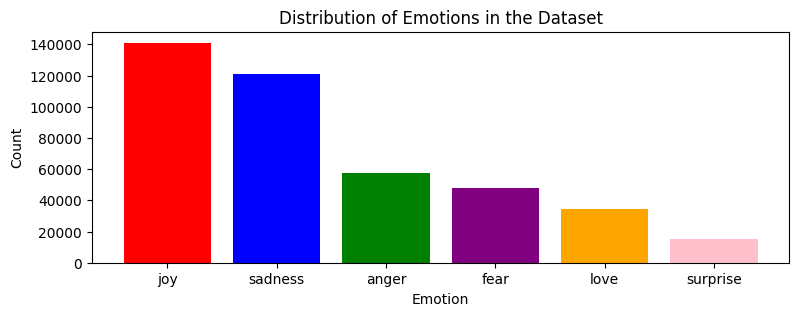

In [11]:
#plotting the distribution of emotions
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(111)
ax.bar(data.emotion.value_counts().index, data.emotion.value_counts(), color=colors)
ax.set_xlabel('Emotion')
ax.set_ylabel('Count')
ax.set_title('Distribution of Emotions in the Dataset')

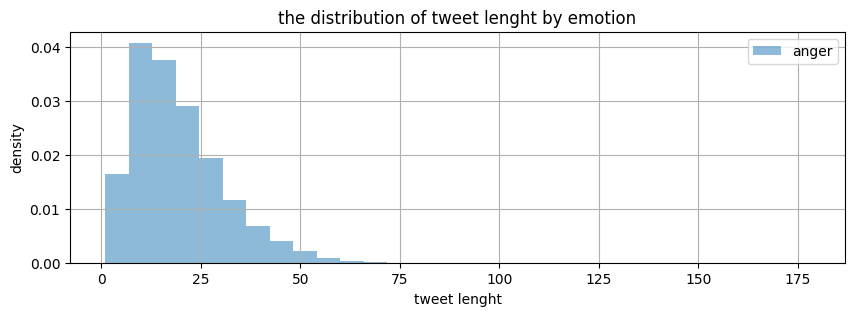

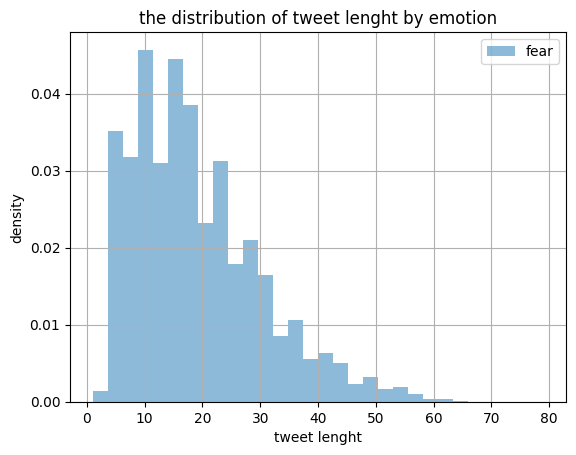

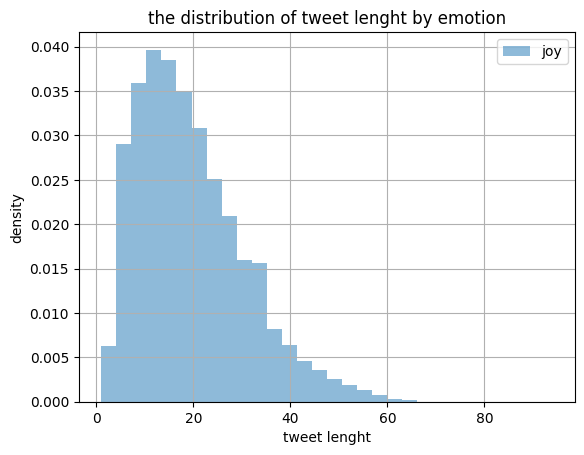

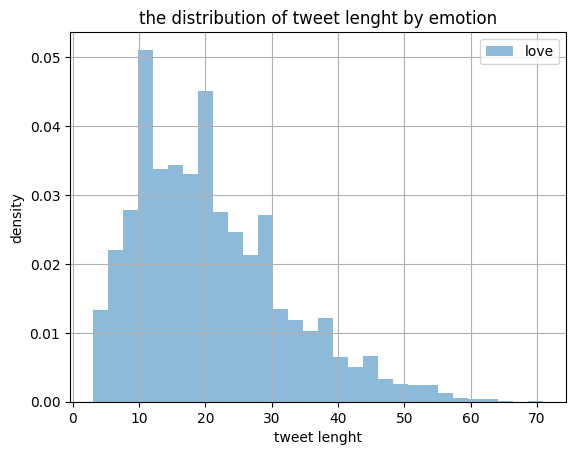

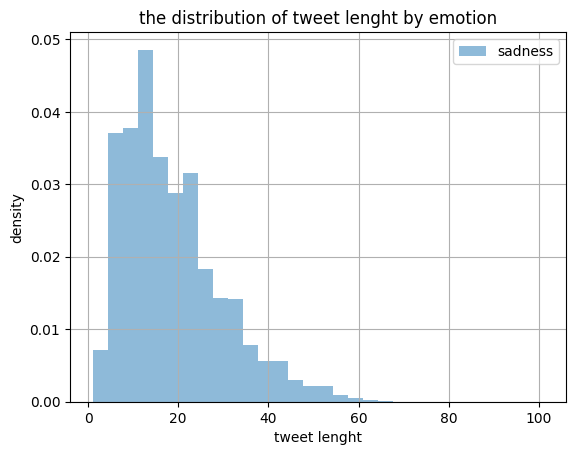

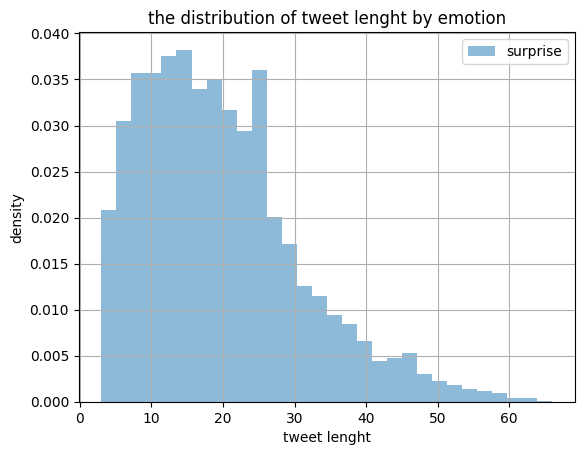

In [12]:
group_by_emotion = data.groupby('emotion')
tweet_lenght_by_emotion = {}
for emotion, group in group_by_emotion:
    tweet_lenght = group['text'].apply(lambda x:len(x.split()))
    tweet_lenght_by_emotion[emotion] = tweet_lenght
plt.figure(figsize=(10, 3))
for emotion, tweet_lenght in tweet_lenght_by_emotion.items():
    plt.hist(tweet_lenght, bins=30, alpha=0.5, label=emotion, density=True)

    plt.title("the distribution of tweet lenght by emotion")
    plt.xlabel("tweet lenght")
    plt.ylabel("density")
    plt.legend()
    plt.grid(True)
    plt.show()

In [13]:
#omiting outliers based on tweet lengths
def detect_outliers_iqr(data, k =1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return (data < lower_bound) | (data > upper_bound)

data['tweet_lenght'] = data['text'].apply(lambda x: len(x.split()))
outliers = detect_outliers_iqr(data['tweet_lenght'])
print(outliers.sum())

10554


In [14]:
#omit tweets more than 30 words
data = data[~outliers]
print(data.shape)

(406255, 5)


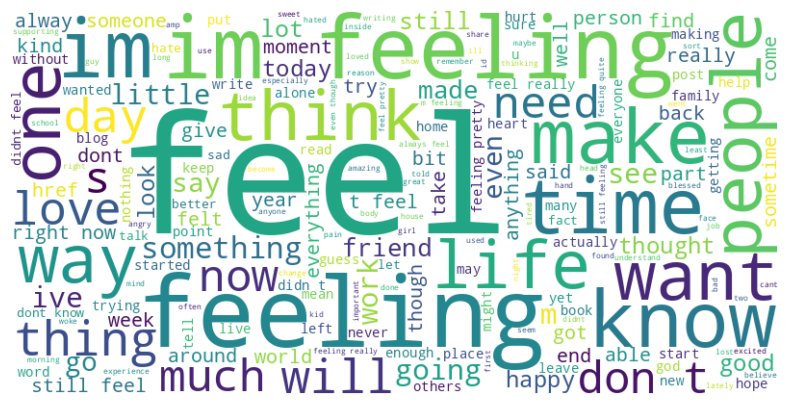

In [16]:
all_tweets = " ".join(data['text'])
wordcloud = WordCloud(width=800, height=400,background_color="white").generate(all_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 1000x500 with 0 Axes>

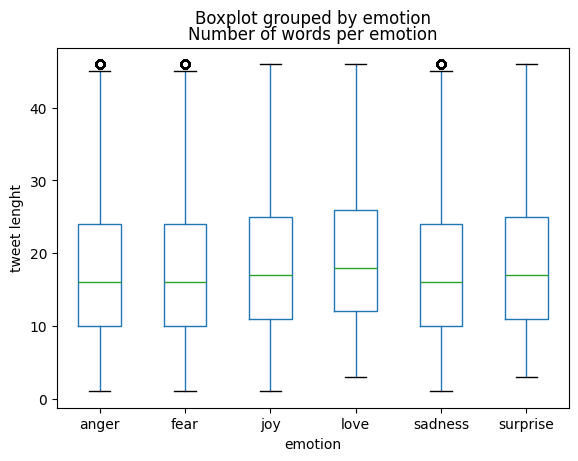

In [17]:
#number of words per emotion boxplot
plt.figure(figsize=(10, 5))
data.boxplot(column='tweet_lenght', by='emotion', grid=False)
plt.ylabel('tweet lenght')
plt.title('Number of words per emotion')
plt.show()
